In [2]:
%pylab --no-import-all notebook
import sys 
sys.path.append("../modules")

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn

In [5]:
import Classification as CL
import Datasets as d
import pandas as pd
import copy
from itertools import chain

In [6]:
import os 
path = os.getcwd()
path = path.replace(path.split('/')[-1],'')

In [7]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif, mutual_info_classif

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel 

/Users/Ghosty/miniconda3/envs/ML/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# First dataset

In [34]:
data = d.load_dataset(name="first_dataset")

In [35]:
feature_matrix = CL.make_matrix(data.data, 
                                combin="all", 
                                okna=[[4, 6], [8, 10], [12, 14, 16], range(5,17)])

In [36]:
LABELS = d.merge_labels(data.labels)
LABELS

array([1., 1., 1., ..., 1., 1., 1.])

In [37]:
np.shape(feature_matrix)

(32816, 29)

In [38]:
col = ["H-alpha", "1.d SGF", "2.d SGF"]
col = col + [f"MM {j}" for j in chain([4, 6], [8, 10], [12, 14, 16])]
col = col + [f"EMM {j}" for j in chain([4, 6], [8, 10], [12, 14, 16])]
col = col + [f"MVar {j}" for j in range(5,17)]
print(col)

['H-alpha', '1.d SGF', '2.d SGF', 'MM 4', 'MM 6', 'MM 8', 'MM 10', 'MM 12', 'MM 14', 'MM 16', 'EMM 4', 'EMM 6', 'EMM 8', 'EMM 10', 'EMM 12', 'EMM 14', 'EMM 16', 'MVar 5', 'MVar 6', 'MVar 7', 'MVar 8', 'MVar 9', 'MVar 10', 'MVar 11', 'MVar 12', 'MVar 13', 'MVar 14', 'MVar 15', 'MVar 16']


In [39]:
col = ["H-alpha", "1.d SGF", "2.d SGF"]
col = col + [f"MM {j}" for j in chain([200, 300], [400, 500], [600, 700, 800])]
col = col + [f"EMM {j}" for j in chain([200, 300], [400, 500], [600, 700, 800])]
col = col + [f"MV {j*50}" for j in range(5,17)]
print(col)

['H-alpha', '1.d SGF', '2.d SGF', 'MM 200', 'MM 300', 'MM 400', 'MM 500', 'MM 600', 'MM 700', 'MM 800', 'EMM 200', 'EMM 300', 'EMM 400', 'EMM 500', 'EMM 600', 'EMM 700', 'EMM 800', 'MV 250', 'MV 300', 'MV 350', 'MV 400', 'MV 450', 'MV 500', 'MV 550', 'MV 600', 'MV 650', 'MV 700', 'MV 750', 'MV 800']


In [40]:
def support(columns, supp):
    col_supp = []
    for i, feat in enumerate(columns):
        if i in supp:
            col_supp.append(feat)
    return col_supp

In [41]:
feature_matrix = pd.DataFrame(feature_matrix, columns=col)
feature_matrix.head()

,H-alpha,1.d SGF,2.d SGF,MM 200,MM 300,MM 400,MM 500,MM 600,MM 700,MM 800,...,MV 350,MV 400,MV 450,MV 500,MV 550,MV 600,MV 650,MV 700,MV 750,MV 800
0,0.958919,0.012462,0.003760,0.958919,0.958919,0.958919,0.958919,0.958919,0.958919,0.958919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.924180,0.000634,-0.011225,0.941549,0.941549,0.941549,0.941549,0.941549,0.941549,0.941549,...,0.000302,0.000302,0.000302,0.000302,0.000302,0.000302,0.000302,0.000302,0.000302,0.000302
2,1.097877,-0.020210,-0.027661,0.993659,0.993659,0.993659,0.993659,0.993659,0.993659,0.993659,...,0.005632,0.005632,0.005632,0.005632,0.005632,0.005632,0.005632,0.005632,0.005632,0.005632
3,1.049904,-0.037340,-0.030494,1.007720,1.007720,1.007720,1.007720,1.007720,1.007720,1.007720,...,0.004817,0.004817,0.004817,0.004817,0.004817,0.004817,0.004817,0.004817,0.004817,0.004817
4,1.016818,-0.028067,-0.002289,1.022195,1.009540,1.009540,1.009540,1.009540,1.009540,1.009540,...,0.003867,0.003867,0.003867,0.003867,0.003867,0.003867,0.003867,0.003867,0.003867,0.003867


<IPython.core.display.Javascript object>


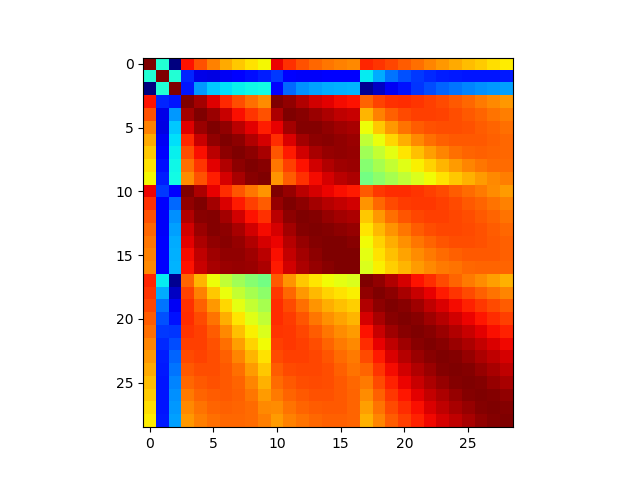

In [42]:
cor = plt.imshow(feature_matrix.corr(),cmap=plt.cm.jet) #plt.cm.hot

In [48]:
corr = feature_matrix.corr()
corr_mat = corr.style.background_gradient(cmap='coolwarm').set_precision(1)


,H-alpha,1.d SGF,2.d SGF,MM 200,MM 300,MM 400,MM 500,MM 600,MM 700,MM 800,EMM 200,EMM 300,EMM 400,EMM 500,EMM 600,EMM 700,EMM 800,MV 250,MV 300,MV 350,MV 400,MV 450,MV 500,MV 550,MV 600,MV 650,MV 700,MV 750,MV 800
H-alpha,1,0.0007,-0.6,0.8,0.7,0.6,0.6,0.5,0.5,0.4,0.8,0.8,0.7,0.7,0.6,0.6,0.6,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.6,0.5,0.5,0.5,0.4
1.d SGF,0.0007,1,-6e-07,-0.4,-0.5,-0.5,-0.5,-0.5,-0.4,-0.4,-0.3,-0.5,-0.5,-0.5,-0.5,-0.5,-0.4,-0.06,-0.2,-0.2,-0.3,-0.3,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4
2.d SGF,-0.6,-6e-07,1,-0.4,-0.2,-0.1,-0.08,-0.06,-0.04,-0.04,-0.4,-0.3,-0.2,-0.2,-0.2,-0.2,-0.2,-0.6,-0.6,-0.5,-0.4,-0.4,-0.3,-0.3,-0.3,-0.2,-0.2,-0.2,-0.2
MM 200,0.8,-0.4,-0.4,1,0.9,0.9,0.8,0.7,0.7,0.6,1,1,0.9,0.9,0.9,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6
MM 300,0.7,-0.5,-0.2,0.9,1,1,0.9,0.8,0.8,0.7,0.9,1,1,1,0.9,0.9,0.9,0.5,0.6,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.6
MM 400,0.6,-0.5,-0.1,0.9,1,1,1,0.9,0.9,0.8,0.8,0.9,1,1,1,1,0.9,0.4,0.5,0.6,0.6,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
MM 500,0.6,-0.5,-0.08,0.8,0.9,1,1,1,0.9,0.9,0.8,0.9,0.9,1,1,1,1,0.3,0.4,0.5,0.5,0.6,0.7,0.7,0.7,0.7,0.7,0.7,0.7
MM 600,0.5,-0.5,-0.06,0.7,0.8,0.9,1,1,1,0.9,0.7,0.8,0.9,0.9,1,1,1,0.3,0.3,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.7,0.7,0.7
MM 700,0.5,-0.4,-0.04,0.7,0.8,0.9,0.9,1,1,1,0.6,0.7,0.8,0.9,0.9,1,1,0.2,0.3,0.3,0.4,0.4,0.5,0.5,0.6,0.6,0.6,0.7,0.7
MM 800,0.4,-0.4,-0.04,0.6,0.7,0.8,0.9,0.9,1,1,0.6,0.7,0.8,0.8,0.9,0.9,0.9,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.5,0.5,0.6,0.6,0.6


In [51]:
type(corr_mat)

pandas.io.formats.style.Styler

In [55]:
from IPython.display import display, HTML
display(HTML(corr_mat.render()))

In [56]:
html = HTML(corr_mat.render())

In [58]:
type(html)

IPython.core.display.HTML

# Variance Threshold

In [15]:
from sklearn.feature_selection import VarianceThreshold

In [39]:
VT = VarianceThreshold(threshold=0.05)
newVT = VT.fit_transform(feature_matrix)

In [40]:
np.shape(newVT)

(32816, 23)

<IPython.core.display.Javascript object>


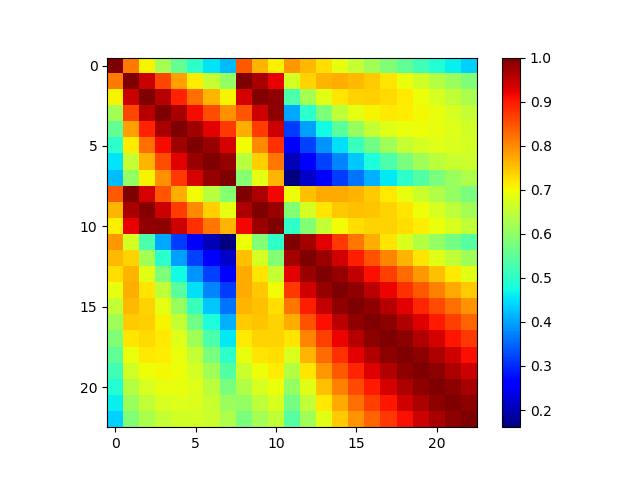

In [41]:
plt.figure("VarianceThreshold")
plt.colorbar(plt.imshow(pd.DataFrame(newVT).corr(),cmap=plt.cm.jet))
plt.show()

## testy s mutual info

In [43]:
from sklearn.feature_selection import mutual_info_classif

In [49]:
X = np.array(feature_matrix)

In [79]:
mutual_info_classif(X[:,0].reshape(32816, 1), LABELS)

array([0.41562395])

In [62]:
mutual_info_classif(X[:,(0,1)], LABELS)

array([0.41678512, 0.31521073])

In [63]:
mutual_info_classif(X[:,(0,1,2)], LABELS)

array([0.41454814, 0.3152552 , 0.22822528])

In [64]:
mutual_info_classif(X[:,(0,1,2,3)], LABELS)

array([0.41684525, 0.31527229, 0.22843784, 0.43655344])

In [65]:
mutual_info_classif(X[:,(0,1,2,3,4)], LABELS)

array([0.41664975, 0.31541601, 0.22864724, 0.43721726, 0.44590943])

In [71]:
sk = SelectKBest(mutual_info_classif, k=2).fit(X[:,(0,1,2,3)], LABELS)

In [72]:
print(sk.scores_)
print(sk.pvalues_)
print(sk.get_support(True))

[0.41627475 0.31520276 0.22840725 0.43648416]
None
[0 3]


## testy s f_classif

In [86]:
from sklearn.feature_selection import f_classif

In [87]:
f_classif(X[:,0].reshape(32816, 1), LABELS)

(array([5298.28607837]), array([0.]))

In [89]:
np.var(X[:,0])*len(X[:,0])

6600.047518137292

In [95]:
np.var(LABELS)*len(LABELS)

25499.44463066796

In [97]:
np.var(X[:,0])/np.var(LABELS)

0.2588310299981778

In [141]:
nx = 5*np.ones(10)+np.random.randn(10)
nx

array([5.72292956, 4.0868956 , 4.36398957, 4.34868294, 5.09316385,
       3.1220722 , 5.17231012, 5.21404548, 4.05508573, 3.3638953 ])

In [142]:
ny = np.zeros(10)+np.random.randn(10)
ny

array([ 0.39744964, -0.8764219 , -0.11198449,  1.06889407,  1.23297501,
       -0.4371512 , -0.65355485, -0.70835637,  1.02678987,  0.58398476])

In [143]:
(np.var(nx)*10/9)/(np.var(np.append(nx,ny))*20/19)

0.12866405299774786

In [144]:
(np.var(ny)*10/9)/(np.var(np.append(nx,ny))*20/19)

0.11853422335975945

In [145]:
np.var(np.append(np.ones(10), 2*np.ones(10)))*20/19

0.2631578947368421

In [146]:
f_classif(np.append(nx,ny).reshape(20,1), np.append(np.ones(10), 2*np.ones(10)))

(array([135.7227547]), array([8.11499877e-10]))

### ANOVA ručně

In [147]:
mx = np.mean(nx)
mx

4.454307036233546

In [148]:
my = np.mean(ny)
my

0.15226245468782545

In [150]:
m = np.mean(np.append(nx,ny))
m

2.303284745460685

In [163]:
SB = (10*((mx-m)**2)+10*((my-m)**2))/(2-1)
SB

92.53793790803448

In [164]:
SW = (sum((nx-mx)**2)+sum((ny-my)**2))/18
SW

0.681815942427494

In [165]:
SB/SW

135.7227547049843

# Select K Best - f_classif

In [166]:
Kbest = SelectKBest(f_classif, k=20)
tmp = Kbest.fit_transform(feature_matrix, LABELS)

In [167]:
Kbest.scores_

array([ 5298.28607837,    74.65825021,   250.80210314,  7465.80784486,
        9142.49037924, 10879.41686578, 12607.39800182, 14194.79193616,
       15512.95581153, 16476.60374002,  7474.66118353,  9156.35451839,
       10899.55713982, 12646.25509897, 14294.84687795, 15742.9064456 ,
       16914.06090445,  2276.94586362,  2903.75422096,  3575.83778751,
        4297.36161345,  5069.93560984,  5894.41877482,  6763.81664456,
        7659.93546709,  8594.72644108,  9564.9521832 , 10557.49232289,
       11537.30165295])

<IPython.core.display.Javascript object>


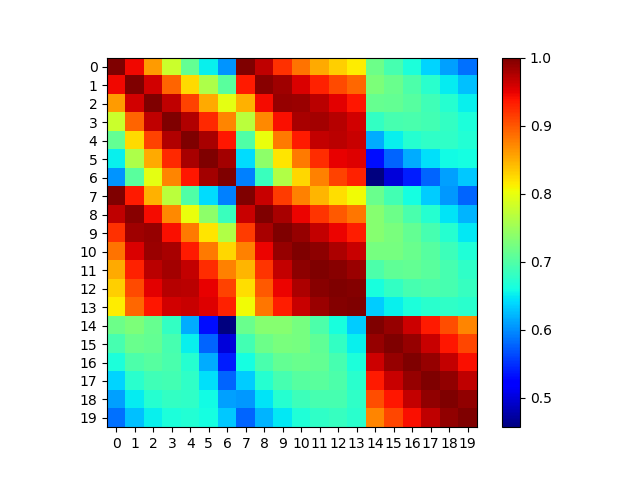

In [168]:
plt.figure("Korelační matice po KBest (f_classif)")
cor_after_Kbest = plt.imshow(pd.DataFrame(tmp).corr(),cmap=plt.cm.jet)#plt.cm.hot
plt.yticks(np.arange(20))
plt.xticks(np.arange(20))

plt.colorbar(cor_after_Kbest)
print()

In [170]:
kbest_sup = Kbest.get_support(True)
kbest_sup

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 23, 24, 25,
       26, 27, 28])

In [171]:
col_after_Kbest = support(col, kbest_sup)

In [172]:
print(col_after_Kbest)

['MM 4', 'MM 6', 'MM 8', 'MM 10', 'MM 12', 'MM 14', 'MM 16', 'EMM 4', 'EMM 6', 'EMM 8', 'EMM 10', 'EMM 12', 'EMM 14', 'EMM 16', 'MVar 11', 'MVar 12', 'MVar 13', 'MVar 14', 'MVar 15', 'MVar 16']


## matual_info_classif

In [173]:
Kbest_MI = SelectKBest(mutual_info_classif, k=20)
tmp1 = Kbest_MI.fit_transform(feature_matrix, LABELS)
Kbest_MI.scores_

array([0.41768664, 0.31527993, 0.2283295 , 0.43660677, 0.44599943,
       0.44791582, 0.44780568, 0.44430949, 0.4316441 , 0.41770166,
       0.42588387, 0.44122333, 0.45095627, 0.45695357, 0.45351111,
       0.44944091, 0.44501983, 0.30719144, 0.33859043, 0.36844536,
       0.39583367, 0.41830298, 0.43724158, 0.45426225, 0.46647326,
       0.47627625, 0.48688328, 0.49642184, 0.49990202])

<IPython.core.display.Javascript object>


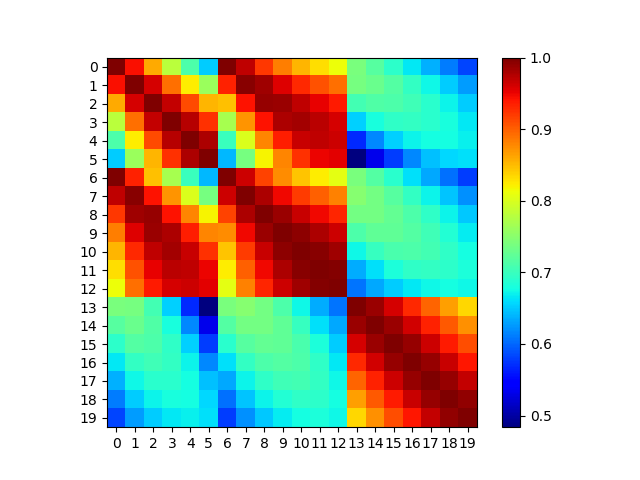

In [174]:
plt.figure("Korelační matice po KBest (matual_info)")
cor_after_Kbest_MI = plt.imshow(pd.DataFrame(tmp1).corr(),cmap=plt.cm.jet)#plt.cm.hot
plt.yticks(np.arange(20))
plt.xticks(np.arange(20))

plt.colorbar(cor_after_Kbest_MI)


In [22]:
col_after_kbest_mi= support(col, Kbest_MI.get_support(True))
print(col_after_kbest_mi)

['MM 4', 'MM 6', 'MM 8', 'MM 10', 'MM 12', 'MM 14', 'EMM 4', 'EMM 6', 'EMM 8', 'EMM 10', 'EMM 12', 'EMM 14', 'EMM 16', 'MVar 10', 'MVar 11', 'MVar 12', 'MVar 13', 'MVar 14', 'MVar 15', 'MVar 16']


In [175]:
print(col_after_Kbest)

['MM 4', 'MM 6', 'MM 8', 'MM 10', 'MM 12', 'MM 14', 'MM 16', 'EMM 4', 'EMM 6', 'EMM 8', 'EMM 10', 'EMM 12', 'EMM 14', 'EMM 16', 'MVar 11', 'MVar 12', 'MVar 13', 'MVar 14', 'MVar 15', 'MVar 16']


In [176]:
print(col_after_kbest_mi)

NameError: name 'col_after_kbest_mi' is not defined

### Kbest(f_classif) se od Kbest(mutal_info) liší jen o jeden příznak (MM16<->MVar10)

#### Vytvoření hromadné tabulky pro první dataset

In [177]:
iterables = [['Důležitost podle metody'], ['Kbest (f_classif)']]

multiindex = pd.MultiIndex.from_product(iterables, names=['', 'Feature'])


In [178]:
FeatSel = pd.DataFrame(np.int_(Kbest.scores_),index=col, columns=multiindex)
FeatSel[('Důležitost podle metody','Kbest (mutual_info)')] = np.round_(Kbest_MI.scores_, decimals=3)

In [179]:
FeatSel.head()
#FeatSel.sort_values([('Důležitost podle metody','Kbest (f_classif)')], ascending=False)

Důležitost podle metody                    
Feature       Kbest (f_classif) Kbest (mutual_info)
H-alpha                    5298               0.418
1.d SGF                      74               0.315
2.d SGF                     250               0.228
MM 4                       7465               0.437
MM 6                       9142               0.446

# Second dataset

In [180]:
DATA2 = d.load_dataset(name="second_dataset")

In [181]:
feature_matrix_2 = CL.make_matrix(DATA2.data, 
                                combin="all", 
                                okna=[[4, 6], [8, 10], [12, 14, 16], range(5,17)])

In [182]:
LABELS2 = d.merge_labels(DATA2.labels)
LABELS2

array([1., 1., 1., ..., 1., 1., 1.])

In [183]:
feature_matrix_2 = pd.DataFrame(feature_matrix_2, columns=col)

## Select K Best - f_classif

In [184]:
Kbest2 = SelectKBest(f_classif, k=20)
tmp2 = Kbest2.fit_transform(feature_matrix_2, LABELS2)

In [185]:
Kbest2.scores_

array([ 3906.28523721,    73.33398768,   247.76780821,  5388.92777019,
        6426.2918581 ,  7406.90554031,  8259.43638072,  8929.64344947,
        9379.52165411,  9621.35956949,  5398.72564468,  6446.94572543,
        7448.45372368,  8347.29851573,  9099.21589119,  9669.69544496,
       10053.72882134,  1352.56766828,  1705.11111115,  2069.59273127,
        2444.9353599 ,  2827.8309579 ,  3215.2080111 ,  3597.1404401 ,
        3959.87505172,  4305.94900278,  4633.05157528,  4930.71213394,
        5193.28659617])

## Mutual_info_classif

In [187]:
Kbest_MI2 = SelectKBest(mutual_info_classif, k=20)
tmp22 = Kbest_MI2.fit_transform(feature_matrix_2, LABELS2)
Kbest_MI2.scores_

array([0.35629643, 0.22502843, 0.1628405 , 0.34980111, 0.35762114,
       0.35665208, 0.34928422, 0.34062768, 0.33889056, 0.3279701 ,
       0.34572405, 0.35095779, 0.35476567, 0.35619599, 0.35859167,
       0.35577074, 0.35207633, 0.22256663, 0.25500123, 0.27641697,
       0.29436153, 0.31146136, 0.33388139, 0.33828359, 0.34443447,
       0.35325192, 0.35916572, 0.36245699, 0.36514066])

#### Vytoření hromadné tabulky pro druhý dataset

In [188]:
iterables2 = [['Důležitost podle metody'], ['Kbest (f_classif)']]
multiindex2 = pd.MultiIndex.from_product(iterables, names=['', 'Feature'])

In [189]:
FeatSel2 = pd.DataFrame(np.int_(Kbest2.scores_),index=col, columns=multiindex2)
FeatSel2[('Důležitost podle metody','Kbest (mutual_info)')] = np.round_(Kbest_MI2.scores_, decimals=3)

In [190]:
FeatSel2.head()

Důležitost podle metody                    
Feature       Kbest (f_classif) Kbest (mutual_info)
H-alpha                    3906               0.356
1.d SGF                      73               0.225
2.d SGF                     247               0.163
MM 4                       5388               0.350
MM 6                       6426               0.358

# Select from Model

In [191]:
valid_path = path + "Tabulky a výsledky/Feature Selection/"

In [192]:
os.listdir(valid_path)

['Nested_Feature_Selection_RF_second.csv',
 'Nested_Feature_Selection_Ada_first.csv',
 'Nested_Feature_Selection_RF_first.csv',
 'FeatureSelection.h5',
 'Nested_Feature_Selection_GB_second.csv',
 'Nested_Feature_Selection_Ada_second.csv',
 'Nested_Feature_Selection_GB_first.csv']

## AdaBoost

### First dataset

In [193]:
ada_first = pd.read_csv(valid_path+'Nested_Feature_Selection_Ada_first.csv')

In [194]:
ada_first.loc[:,"prumer"]=ada_first.mean(1)
ada_first.loc[:,"fs - mean"]=ada_first["prumer"]>ada_first["1"].mean()
ada_first.loc[:,"fs - median"]=ada_first["prumer"]>ada_first["1"].median()

In [195]:
ada_first.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,prumer,fs - mean,fs - median
0,H-alpha,0.048,0.048,0.044,0.058,0.042,0.044,0.038,0.048,0.040,0.048,0.0458,True,True
1,1.d SGF,0.164,0.160,0.176,0.146,0.142,0.158,0.170,0.166,0.172,0.170,0.1624,True,True
2,2.d SGF,0.068,0.068,0.070,0.060,0.044,0.066,0.072,0.074,0.066,0.074,0.0662,True,True
3,MM 4,0.008,0.002,0.010,0.014,0.002,0.012,0.012,0.010,0.006,0.020,0.0096,False,False
4,MM 6,0.020,0.028,0.018,0.008,0.030,0.016,0.012,0.006,0.014,0.002,0.0154,False,False


### Second dataset

In [196]:
ada_second = pd.read_csv(valid_path+'Nested_Feature_Selection_Ada_second.csv')

In [197]:
ada_second.loc[:,"prumer"]=ada_second.mean(1)
ada_second.loc[:,"fs - mean"]=ada_second["prumer"]>ada_second["1"].mean()
ada_second.loc[:,"fs - median"]=ada_second["prumer"]>ada_second["1"].median()

In [198]:
ada_second.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,prumer,fs - mean,fs - median
0,H-alpha,0.060,0.054,0.054,0.056,0.034,0.048,0.046,0.060,0.044,0.062,0.0518,True,True
1,1.d SGF,0.160,0.170,0.162,0.158,0.160,0.156,0.168,0.156,0.160,0.158,0.1608,True,True
2,2.d SGF,0.076,0.088,0.074,0.076,0.076,0.068,0.080,0.066,0.058,0.076,0.0738,True,True
3,MM 4,0.046,0.036,0.040,0.026,0.018,0.044,0.036,0.042,0.028,0.032,0.0348,True,True
4,MM 6,0.026,0.028,0.024,0.026,0.042,0.028,0.036,0.020,0.038,0.030,0.0298,False,True


In [199]:
FeatSel[('Důležitost podle metody','AdaBoost')] = np.round_(np.array(ada_first["prumer"]), decimals=3)

In [200]:
FeatSel.head()

Důležitost podle metody                             
Feature       Kbest (f_classif) Kbest (mutual_info) AdaBoost
H-alpha                    5298               0.418    0.046
1.d SGF                      74               0.315    0.162
2.d SGF                     250               0.228    0.066
MM 4                       7465               0.437    0.010
MM 6                       9142               0.446    0.015

In [201]:
FeatSel2[('Důležitost podle metody','AdaBoost')] = np.round_(np.array(ada_second["prumer"]), decimals=3)

In [202]:
FeatSel2.head()

Důležitost podle metody                             
Feature       Kbest (f_classif) Kbest (mutual_info) AdaBoost
H-alpha                    3906               0.356    0.052
1.d SGF                      73               0.225    0.161
2.d SGF                     247               0.163    0.074
MM 4                       5388               0.350    0.035
MM 6                       6426               0.358    0.030

## GradientBoost

### First dataset

In [203]:
GB_first = pd.read_csv(valid_path+'Nested_Feature_Selection_GB_first.csv')

In [204]:
GB_first.loc[:,"prumer"]=GB_first.mean(1)
GB_first.loc[:,"fs - mean"]=GB_first["prumer"]>GB_first["1"].mean()
GB_first.loc[:,"fs - median"]=GB_first["prumer"]>GB_first["1"].median()

In [205]:
GB_first.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,prumer,fs - mean,fs - median
0,H-alpha,0.0533,0.0447,0.0663,0.0464,0.0584,0.0566,0.0670,0.0707,0.0676,0.0632,0.05942,True,True
1,1.d SGF,0.1326,0.1265,0.1340,0.1331,0.1283,0.1286,0.1261,0.1305,0.1386,0.1229,0.13012,True,True
2,2.d SGF,0.0966,0.1030,0.0967,0.1003,0.1092,0.1027,0.0964,0.0958,0.1013,0.0993,0.10013,True,True
3,MM 4,0.0315,0.0237,0.0289,0.0226,0.0332,0.0224,0.0195,0.0263,0.0254,0.0226,0.02561,False,True
4,MM 6,0.0142,0.0217,0.0150,0.0155,0.0161,0.0164,0.0181,0.0186,0.0165,0.0179,0.01700,False,False


### Second dataset

In [206]:
GB_second = pd.read_csv(valid_path+'Nested_Feature_Selection_GB_second.csv')

In [207]:
GB_second.loc[:,"prumer"]=GB_second.mean(1)
GB_second.loc[:,"fs - mean"]=GB_second["prumer"]>GB_second["1"].mean()
GB_second.loc[:,"fs - median"]=GB_second["prumer"]>GB_second["1"].median()

In [208]:
GB_second.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,prumer,fs - mean,fs - median
0,H-alpha,0.0593,0.0583,0.0506,0.0618,0.0537,0.0540,0.0532,0.0645,0.0576,0.0509,0.05639,True,True
1,1.d SGF,0.1423,0.1359,0.1316,0.1367,0.1311,0.1341,0.1278,0.1276,0.1342,0.1477,0.13490,True,True
2,2.d SGF,0.1057,0.1050,0.1036,0.0992,0.1001,0.0991,0.1018,0.1057,0.0937,0.1025,0.10164,True,True
3,MM 4,0.0196,0.0241,0.0238,0.0176,0.0205,0.0253,0.0227,0.0176,0.0244,0.0248,0.02204,False,True
4,MM 6,0.0267,0.0273,0.0213,0.0231,0.0251,0.0214,0.0246,0.0222,0.0285,0.0275,0.02477,False,True


In [209]:
FeatSel[('Důležitost podle metody','GradientBoost')] = np.round_(np.array(GB_first["prumer"]), decimals=3)

In [210]:
FeatSel.head()

Důležitost podle metody                                           
Feature       Kbest (f_classif) Kbest (mutual_info) AdaBoost GradientBoost
H-alpha                    5298               0.418    0.046         0.059
1.d SGF                      74               0.315    0.162         0.130
2.d SGF                     250               0.228    0.066         0.100
MM 4                       7465               0.437    0.010         0.026
MM 6                       9142               0.446    0.015         0.017

In [211]:
FeatSel2[('Důležitost podle metody','GB')] = np.round_(np.array(GB_second["prumer"]), decimals=3)

In [212]:
FeatSel2.head()

Důležitost podle metody                                    
Feature       Kbest (f_classif) Kbest (mutual_info) AdaBoost     GB
H-alpha                    3906               0.356    0.052  0.056
1.d SGF                      73               0.225    0.161  0.135
2.d SGF                     247               0.163    0.074  0.102
MM 4                       5388               0.350    0.035  0.022
MM 6                       6426               0.358    0.030  0.025

## Random Forests

### First dataset

In [213]:
rf_first = pd.read_csv(valid_path+'Nested_Feature_Selection_RF_first.csv')

In [214]:
rf_first.loc[:,"prumer"]=rf_first.mean(1)
rf_first.loc[:,"fs - mean"]=rf_first["prumer"]>rf_first["1"].mean()
rf_first.loc[:,"fs - median"]=rf_first["prumer"]>rf_first["1"].median()

In [215]:
rf_first.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,prumer,fs - mean,fs - median
0,H-alpha,0.0089,0.0120,0.0106,0.0082,0.0121,0.0149,0.0138,0.0152,0.0152,0.0120,0.01229,False,False
1,1.d SGF,0.0220,0.0204,0.0193,0.0206,0.0176,0.0166,0.0215,0.0195,0.0167,0.0179,0.01921,False,False
2,2.d SGF,0.0057,0.0065,0.0062,0.0064,0.0074,0.0061,0.0066,0.0074,0.0082,0.0062,0.00667,False,False
3,MM 4,0.0131,0.0139,0.0175,0.0150,0.0156,0.0135,0.0222,0.0156,0.0116,0.0138,0.01518,False,False
4,MM 6,0.0159,0.0210,0.0277,0.0327,0.0185,0.0338,0.0231,0.0224,0.0176,0.0159,0.02286,False,True


### Second dataset

In [216]:
rf_second = pd.read_csv(valid_path+'Nested_Feature_Selection_RF_second.csv')

In [217]:
rf_second.loc[:,"prumer"]=rf_second.mean(1)
rf_second.loc[:,"fs - mean"]=rf_second["prumer"]>rf_second["1"].mean()
rf_second.loc[:,"fs - median"]=rf_second["prumer"]>rf_second["1"].median()

In [218]:
rf_second.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,prumer,fs - mean,fs - median
0,H-alpha,0.0132,0.0083,0.0086,0.0048,0.0062,0.0060,0.0147,0.0086,0.0101,0.0077,0.00882,False,False
1,1.d SGF,0.0151,0.0140,0.0191,0.0123,0.0135,0.0152,0.0162,0.0128,0.0178,0.0130,0.01490,False,False
2,2.d SGF,0.0050,0.0045,0.0043,0.0037,0.0059,0.0045,0.0049,0.0041,0.0039,0.0046,0.00454,False,False
3,MM 4,0.0205,0.0119,0.0112,0.0143,0.0256,0.0156,0.0177,0.0201,0.0115,0.0148,0.01632,False,False
4,MM 6,0.0229,0.0203,0.0187,0.0151,0.0232,0.0210,0.0222,0.0196,0.0149,0.0326,0.02105,False,False


In [219]:
FeatSel[('Důležitost podle metody','Random Forest')] = np.round_(np.array(rf_first["prumer"]), decimals=3)

In [220]:
FeatSel.head()

Důležitost podle metody                                             \
Feature       Kbest (f_classif) Kbest (mutual_info) AdaBoost GradientBoost   
H-alpha                    5298               0.418    0.046         0.059   
1.d SGF                      74               0.315    0.162         0.130   
2.d SGF                     250               0.228    0.066         0.100   
MM 4                       7465               0.437    0.010         0.026   
MM 6                       9142               0.446    0.015         0.017   

                       
Feature Random Forest  
H-alpha         0.012  
1.d SGF         0.019  
2.d SGF         0.007  
MM 4            0.015  
MM 6            0.023

In [221]:
FeatSel2[('Důležitost podle metody','Random Forest')] = np.round_(np.array(rf_second["prumer"]), decimals=3)

In [222]:
FeatSel2.head()

Důležitost podle metody                                      \
Feature       Kbest (f_classif) Kbest (mutual_info) AdaBoost     GB   
H-alpha                    3906               0.356    0.052  0.056   
1.d SGF                      73               0.225    0.161  0.135   
2.d SGF                     247               0.163    0.074  0.102   
MM 4                       5388               0.350    0.035  0.022   
MM 6                       6426               0.358    0.030  0.025   

                       
Feature Random Forest  
H-alpha         0.009  
1.d SGF         0.015  
2.d SGF         0.005  
MM 4            0.016  
MM 6            0.021

# Shrnutí FS pro první dataset

Pokud připustíme výběr příznaků podle střední hodnoty (průměru), tzn. pokud je důležitost příznaku větší než průměrná důležitost, pak ho přijmu (nechám). <br><br>
V případě, kdy se přikloníme k výběru podle mediánu, který se od výběru podle střední hodnoty liší pouze porovnáváním důležitosti s mediánem (né střední hodnotou).<br>
Pokud bychom chtěli jen několik nejlepších, tak jednoduše vezmeme jen těch K nejlepeších. (analogie Kbest metody)

In [223]:
FeatSel[('Výběr podle střední hodnoty','AdaBoost')] = ada_first["fs - mean"].values
FeatSel[('Výběr podle střední hodnoty','GradientBoost')] = GB_first["fs - mean"].values
FeatSel[('Výběr podle střední hodnoty','Random Forest')] = rf_first["fs - mean"].values

In [224]:
FeatSel.head()

Důležitost podle metody                                             \
Feature       Kbest (f_classif) Kbest (mutual_info) AdaBoost GradientBoost   
H-alpha                    5298               0.418    0.046         0.059   
1.d SGF                      74               0.315    0.162         0.130   
2.d SGF                     250               0.228    0.066         0.100   
MM 4                       7465               0.437    0.010         0.026   
MM 6                       9142               0.446    0.015         0.017   

                      Výběr podle střední hodnoty                              
Feature Random Forest                    AdaBoost GradientBoost Random Forest  
H-alpha         0.012                        True          True         False  
1.d SGF         0.019                        True          True         False  
2.d SGF         0.007                        True          True         False  
MM 4            0.015                       False         False         False  
MM 6            0.023                       False         False         False

In [225]:
FeatSel[('Výběr podle mediánu','AdaBoost')] = ada_first["fs - median"].values
FeatSel[('Výběr podle mediánu','GradientBoost')] = GB_first["fs - median"].values
FeatSel[('Výběr podle mediánu','Random Forest')] = rf_first["fs - median"].values

In [226]:
FeatSel.columns = pd.MultiIndex(levels=[['Důležitost podle metody', 'Výběr podle střední hodnoty', 'Výběr podle mediánu'], ['f_classif', 'mutual_info', 'AdaBoost', 'GB', 'Random Forest']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 3, 4, 2, 3, 4, 2, 3, 4]],
           names=['', 'Feature'])

In [227]:
FeatSel

Důležitost podle metody                                            \
Feature               f_classif mutual_info AdaBoost     GB Random Forest   
H-alpha                    5298       0.418    0.046  0.059         0.012   
1.d SGF                      74       0.315    0.162  0.130         0.019   
2.d SGF                     250       0.228    0.066  0.100         0.007   
MM 4                       7465       0.437    0.010  0.026         0.015   
MM 6                       9142       0.446    0.015  0.017         0.023   
MM 8                      10879       0.448    0.011  0.017         0.036   
MM 10                     12607       0.448    0.005  0.016         0.040   
MM 12                     14194       0.444    0.024  0.018         0.037   
MM 14                     15512       0.432    0.059  0.017         0.022   
MM 16                     16476       0.418    0.083  0.051         0.015   
EMM 4                      7474       0.426    0.032  0.028         0.014   
EMM 6                      9156       0.441    0.014  0.024         0.023   
EMM 8                     10899       0.451    0.014  0.012         0.047   
EMM 10                    12646       0.457    0.003  0.008         0.063   
EMM 12                    14294       0.454    0.003  0.011         0.081   
EMM 14                    15742       0.449    0.036  0.019         0.091   
EMM 16                    16914       0.445    0.050  0.034         0.103   
MVar 5                     2276       0.307    0.019  0.035         0.003   
MVar 6                     2903       0.339    0.007  0.023         0.004   
MVar 7                     3575       0.368    0.017  0.020         0.005   
MVar 8                     4297       0.396    0.008  0.016         0.007   
MVar 9                     5069       0.418    0.018  0.018         0.011   
MVar 10                    5894       0.437    0.012  0.017         0.017   
MVar 11                    6763       0.454    0.010  0.023         0.023   
MVar 12                    7659       0.466    0.002  0.022         0.032   
MVar 13                    8594       0.476    0.019  0.027         0.043   
MVar 14                    9564       0.487    0.018  0.031         0.055   
MVar 15                   10557       0.496    0.021  0.023         0.071   
MVar 16                   11537       0.500    0.212  0.156         0.083   

        Výběr podle střední hodnoty                      Výběr podle mediánu  \
Feature                    AdaBoost     GB Random Forest            AdaBoost   
H-alpha                        True   True         False                True   
1.d SGF                        True   True         False                True   
2.d SGF                        True   True         False                True   
MM 4                          False  False         False               False   
MM 6                          False  False         False               False   
MM 8                          False  False          True               False   
MM 10                         False  False          True               False   
MM 12                         False  False          True                True   
MM 14                          True  False         False                True   
MM 16                          True   True         False                True   
EMM 4                         False  False         False                True   
EMM 6                         False  False         False               False   
EMM 8                         False  False          True               False   
EMM 10                        False  False          True               False   
EMM 12                        False  False          True               False   
EMM 14                         True  False          True                True   
EMM 16                         True  False          True                True   
MVar 5                        False   True         False                True   
MVar 6              

In [228]:
FeatSel.to_hdf(valid_path + 'FeatureSelection.h5','First_dataset')

In [229]:
pd.read_hdf(valid_path + 'FeatureSelection.h5', 'First_dataset')

Důležitost podle metody                                            \
Feature               f_classif mutual_info AdaBoost     GB Random Forest   
H-alpha                    5298       0.418    0.046  0.059         0.012   
1.d SGF                      74       0.315    0.162  0.130         0.019   
2.d SGF                     250       0.228    0.066  0.100         0.007   
MM 4                       7465       0.437    0.010  0.026         0.015   
MM 6                       9142       0.446    0.015  0.017         0.023   
MM 8                      10879       0.448    0.011  0.017         0.036   
MM 10                     12607       0.448    0.005  0.016         0.040   
MM 12                     14194       0.444    0.024  0.018         0.037   
MM 14                     15512       0.432    0.059  0.017         0.022   
MM 16                     16476       0.418    0.083  0.051         0.015   
EMM 4                      7474       0.426    0.032  0.028         0.014   
EMM 6                      9156       0.441    0.014  0.024         0.023   
EMM 8                     10899       0.451    0.014  0.012         0.047   
EMM 10                    12646       0.457    0.003  0.008         0.063   
EMM 12                    14294       0.454    0.003  0.011         0.081   
EMM 14                    15742       0.449    0.036  0.019         0.091   
EMM 16                    16914       0.445    0.050  0.034         0.103   
MVar 5                     2276       0.307    0.019  0.035         0.003   
MVar 6                     2903       0.339    0.007  0.023         0.004   
MVar 7                     3575       0.368    0.017  0.020         0.005   
MVar 8                     4297       0.396    0.008  0.016         0.007   
MVar 9                     5069       0.418    0.018  0.018         0.011   
MVar 10                    5894       0.437    0.012  0.017         0.017   
MVar 11                    6763       0.454    0.010  0.023         0.023   
MVar 12                    7659       0.466    0.002  0.022         0.032   
MVar 13                    8594       0.476    0.019  0.027         0.043   
MVar 14                    9564       0.487    0.018  0.031         0.055   
MVar 15                   10557       0.496    0.021  0.023         0.071   
MVar 16                   11537       0.500    0.212  0.156         0.083   

        Výběr podle střední hodnoty                      Výběr podle mediánu  \
Feature                    AdaBoost     GB Random Forest            AdaBoost   
H-alpha                        True   True         False                True   
1.d SGF                        True   True         False                True   
2.d SGF                        True   True         False                True   
MM 4                          False  False         False               False   
MM 6                          False  False         False               False   
MM 8                          False  False          True               False   
MM 10                         False  False          True               False   
MM 12                         False  False          True                True   
MM 14                          True  False         False                True   
MM 16                          True   True         False                True   
EMM 4                         False  False         False                True   
EMM 6                         False  False         False               False   
EMM 8                         False  False          True               False   
EMM 10                        False  False          True               False   
EMM 12                        False  False          True               False   
EMM 14                         True  False          True                True   
EMM 16                         True  False          True                True   
MVar 5                        False   True         False                True   
MVar 6              

# Shrnuté FS pro druhý dataset

In [230]:
FeatSel2[('Výběr podle střední hodnoty','AdaBoost')] = ada_second["fs - mean"].values
FeatSel2[('Výběr podle střední hodnoty','GradientBoost')] = GB_second["fs - mean"].values
FeatSel2[('Výběr podle střední hodnoty','Random Forest')] = rf_second["fs - mean"].values

In [231]:
FeatSel2.head()

Důležitost podle metody                                      \
Feature       Kbest (f_classif) Kbest (mutual_info) AdaBoost     GB   
H-alpha                    3906               0.356    0.052  0.056   
1.d SGF                      73               0.225    0.161  0.135   
2.d SGF                     247               0.163    0.074  0.102   
MM 4                       5388               0.350    0.035  0.022   
MM 6                       6426               0.358    0.030  0.025   

                      Výběr podle střední hodnoty                              
Feature Random Forest                    AdaBoost GradientBoost Random Forest  
H-alpha         0.009                        True          True         False  
1.d SGF         0.015                        True          True         False  
2.d SGF         0.005                        True          True         False  
MM 4            0.016                        True         False         False  
MM 6            0.021                       False         False         False

In [232]:
FeatSel2[('Výběr podle mediánu','AdaBoost')] = ada_second["fs - median"].values
FeatSel2[('Výběr podle mediánu','GradientBoost')] = GB_second["fs - median"].values
FeatSel2[('Výběr podle mediánu','Random Forest')] = rf_second["fs - median"].values

In [233]:
FeatSel2.columns = pd.MultiIndex(levels=[['Důležitost podle metody', 'Výběr podle střední hodnoty', 'Výběr podle mediánu'], ['f_classif', 'mutual_info', 'AdaBoost', 'GB', 'Random Forest']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 3, 4, 2, 3, 4, 2, 3, 4]],
           names=['', 'Feature'])

In [234]:
FeatSel2

Důležitost podle metody                                            \
Feature               f_classif mutual_info AdaBoost     GB Random Forest   
H-alpha                    3906       0.356    0.052  0.056         0.009   
1.d SGF                      73       0.225    0.161  0.135         0.015   
2.d SGF                     247       0.163    0.074  0.102         0.005   
MM 4                       5388       0.350    0.035  0.022         0.016   
MM 6                       6426       0.358    0.030  0.025         0.021   
MM 8                       7406       0.357    0.029  0.020         0.036   
MM 10                      8259       0.349    0.009  0.017         0.032   
MM 12                      8929       0.341    0.030  0.016         0.024   
MM 14                      9379       0.339    0.041  0.019         0.014   
MM 16                      9621       0.328    0.075  0.059         0.013   
EMM 4                      5398       0.346    0.017  0.039         0.018   
EMM 6                      6446       0.351    0.009  0.022         0.032   
EMM 8                      7448       0.355    0.008  0.023         0.049   
EMM 10                     8347       0.356    0.007  0.014         0.068   
EMM 12                     9099       0.359    0.003  0.010         0.082   
EMM 14                     9669       0.356    0.007  0.014         0.088   
EMM 16                    10053       0.352    0.061  0.038         0.071   
MVar 5                     1352       0.223    0.015  0.035         0.004   
MVar 6                     1705       0.255    0.010  0.017         0.006   
MVar 7                     2069       0.276    0.017  0.020         0.008   
MVar 8                     2444       0.294    0.009  0.017         0.012   
MVar 9                     2827       0.311    0.009  0.019         0.016   
MVar 10                    3215       0.334    0.017  0.016         0.024   
MVar 11                    3597       0.338    0.012  0.024         0.034   
MVar 12                    3959       0.344    0.010  0.019         0.044   
MVar 13                    4305       0.353    0.010  0.020         0.050   
MVar 14                    4633       0.359    0.010  0.024         0.063   
MVar 15                    4930       0.362    0.019  0.024         0.071   
MVar 16                    5193       0.365    0.215  0.136         0.076   

        Výběr podle střední hodnoty                      Výběr podle mediánu  \
Feature                    AdaBoost     GB Random Forest            AdaBoost   
H-alpha                        True   True         False                True   
1.d SGF                        True   True         False                True   
2.d SGF                        True   True         False                True   
MM 4                           True  False         False                True   
MM 6                          False  False         False                True   
MM 8                          False  False          True                True   
MM 10                         False  False         False               False   
MM 12                         False  False         False                True   
MM 14                          True  False         False                True   
MM 16                          True   True         False                True   
EMM 4                         False   True         False                True   
EMM 6                         False  False         False               False   
EMM 8                         False  False          True               False   
EMM 10                        False  False          True               False   
EMM 12                        False  False          True               False   
EMM 14                        False  False          True               False   
EMM 16                         True   True          True                True   
MVar 5                        False   True         False               False   
MVar 6              

In [235]:
FeatSel2.to_hdf(valid_path + 'FeatureSelection.h5','Second_dataset')

In [248]:
FeatSel[("Důležitost podle metody", "GB")].values.mean()

0.03441379310344828